
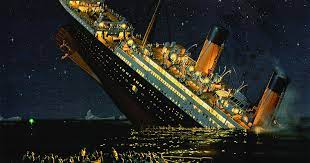

In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB , MultinomialNB

In [2]:
df_train = pd.read_csv('train.csv')

In [82]:
#df_test = pd.read_csv('test.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.drop(columns = ['Name','Ticket'],inplace = True)

In [6]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [8]:
pd.isnull(df_train).sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# cabin is not a good feature for us because more than 50% is null
df_train = df_train.dropna(thresh = 400,axis = 1)#axis = o-> row
#df_train.drop(columns = ['Cabin'],inplace = True)

In [10]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [11]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
nulle = pd.isnull(df_train['Embarked'])

In [15]:
df_train[nulle]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [16]:
df_train.iloc[60:62]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
60,61,0,3,male,22.0,0,0,7.2292,C
61,62,1,1,female,38.0,0,0,80.0000,NaN


In [17]:
df_train['Embarked']=df_train['Embarked'].fillna(method='ffill')

<ipython-input-17-635f1b8a465e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Embarked']=df_train['Embarked'].fillna(method='ffill')


In [18]:
df_train.iloc[60:62]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
60,61,0,3,male,22.0,0,0,7.2292,C
61,62,1,1,female,38.0,0,0,80.0000,C


In [19]:
pd.isnull(df_train).sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [21]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
df_encoded = dummies('Embarked',df_train)

In [22]:
df_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,male,22.0,1,0,7.2500,0,1
1,2,1,1,female,38.0,1,0,71.2833,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,1
3,4,1,1,female,35.0,1,0,53.1000,0,1
4,5,0,3,male,35.0,0,0,8.0500,0,1


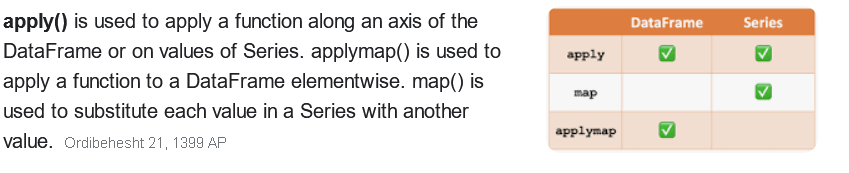

In [23]:
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 1, 'female': 0})

In [24]:
df_encoded.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
5,6,0,3,1,NaN,0,0,8.4583,1,0
6,7,0,1,1,54.0,0,0,51.8625,0,1
7,8,0,3,1,2.0,3,1,21.0750,0,1
8,9,1,3,0,27.0,0,2,11.1333,0,1
9,10,1,2,0,14.0,1,0,30.0708,0,0


In [25]:
df_encoded.info()# all are int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 57.6 KB


In [26]:
df_encoded.drop(columns = ['PassengerId'],inplace = True)

<AxesSubplot:>

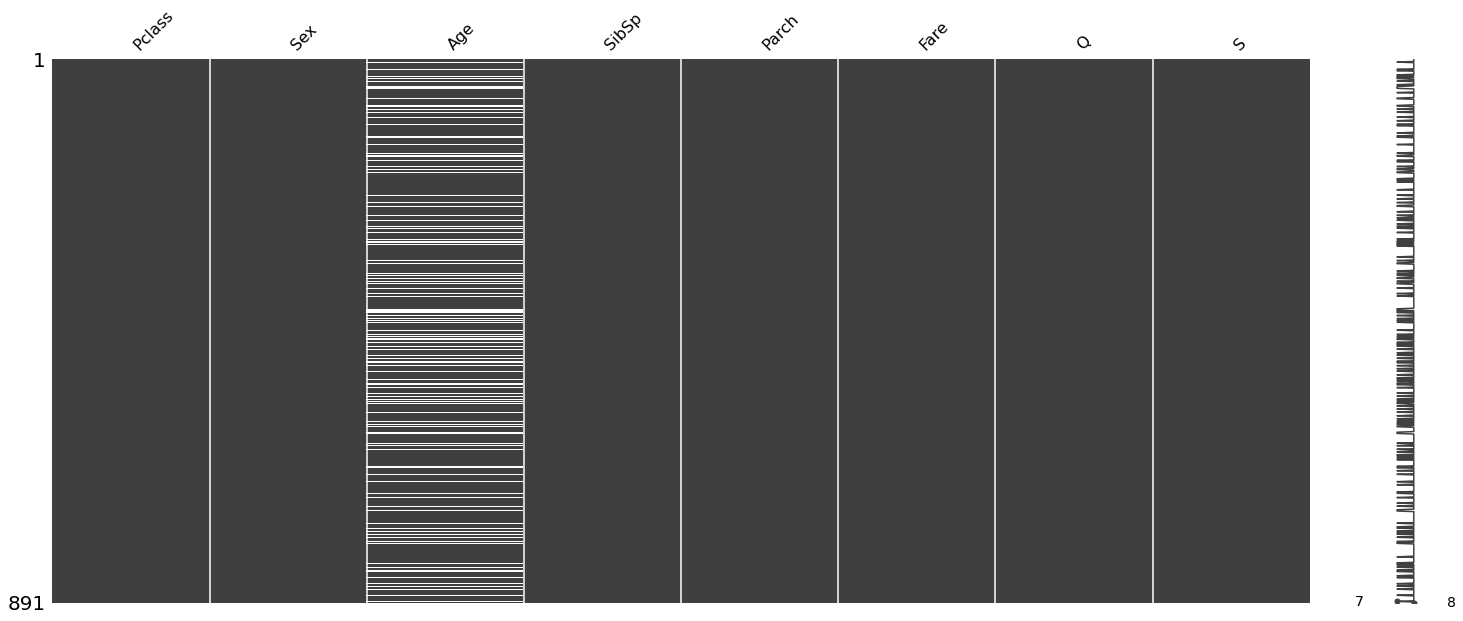

In [27]:
import missingno as msno
msno.matrix(df_encoded.drop(['Survived'],axis=1))

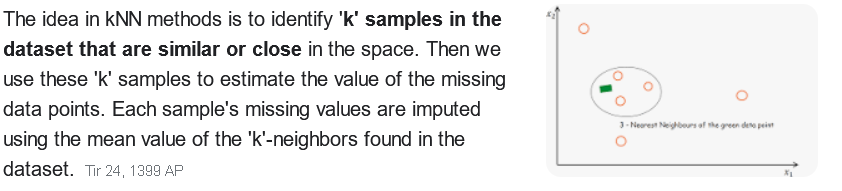

In [28]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df_encoded)

In [29]:
df = pd.DataFrame(data=df_filled)

In [30]:
df

,0,1,2,3,4,5,6,7,8
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0,1.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,1.0
888,0.0,3.0,0.0,26.8,1.0,2.0,23.4500,0.0,1.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0


In [31]:
def change_name_columns(df_old,df_new):
    name_columns=list(df_old.columns)
    df_new.columns=name_columns
    return df_new
df_filled=change_name_columns(df_encoded,df)

In [32]:
df_filled.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,1.0
5,0.0,3.0,1.0,47.8,0.0,0.0,8.4583,1.0,0.0
6,0.0,1.0,1.0,54.0,0.0,0.0,51.8625,0.0,1.0
7,0.0,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,1.0
8,1.0,3.0,0.0,27.0,0.0,2.0,11.1333,0.0,1.0
9,1.0,2.0,0.0,14.0,1.0,0.0,30.0708,0.0,0.0


In [33]:
pd.isnull(df_filled).sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


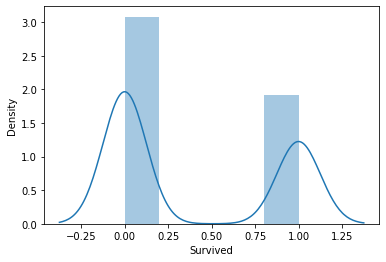

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


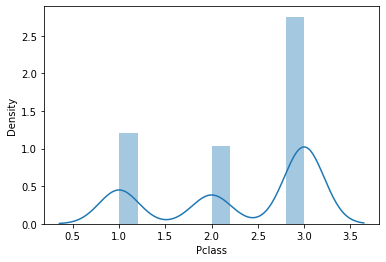

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


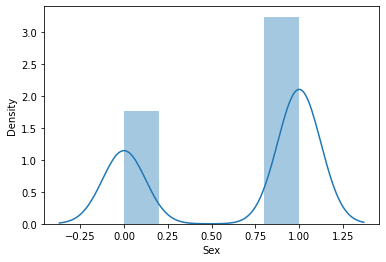

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


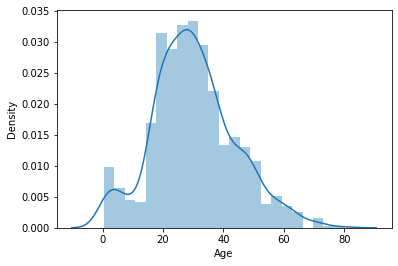

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


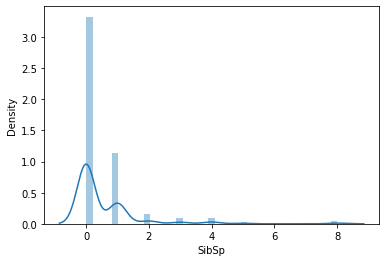

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


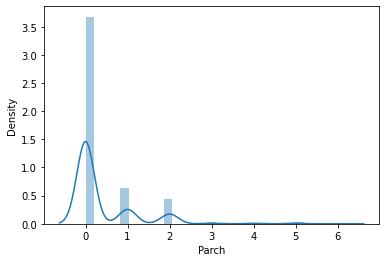

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


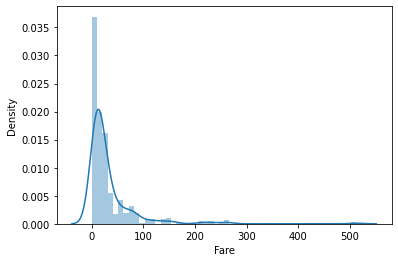

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


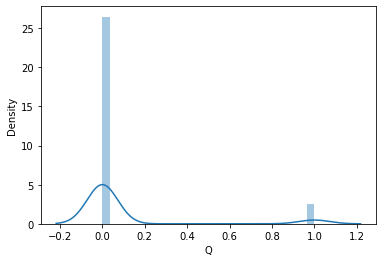

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


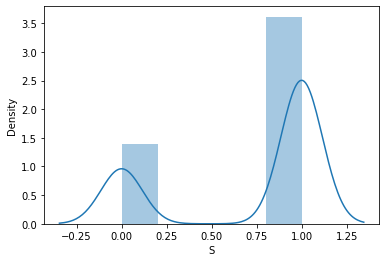

In [34]:
data_feature = df_filled.columns
for i in data_feature:
    p = sns.distplot(a = df_filled[i])
    plt.show()

In [35]:
from sklearn.neighbors import LocalOutlierFactor
def outlier_detection(df):
    x = df.drop("Survived", axis=1)
    y = df.Survived
    lof = LocalOutlierFactor(n_neighbors = 10, metric= "euclidean") #or manhattan

    res = lof.fit_predict(x)
    print(res)
    x_o = x[res != -1]
    y_o = y[res != -1]
    df = pd.concat([x_o, y_o], axis=1)
    return df
df_cleaned= outlier_detection(df_filled)

[ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [116]:
# معیار این شاخص دنسیتی بیس نیست
# معیار بر اساس فاصله در مناطق مختلف است
# معمولا بر اساس ده داده در نردیک ترین همسایگی اطراف بررسی می شود

In [36]:
df_cleaned.shape

(816, 9)

In [37]:
df_filled.shape

(891, 9)

In [38]:
df_cleaned

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0,1.0
5,3.0,1.0,47.8,0.0,0.0,8.4583,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,1.0,1.0
888,3.0,0.0,26.8,1.0,2.0,23.4500,0.0,1.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0,1.0


In [120]:
df_cleaned.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'Survived'], dtype='object')

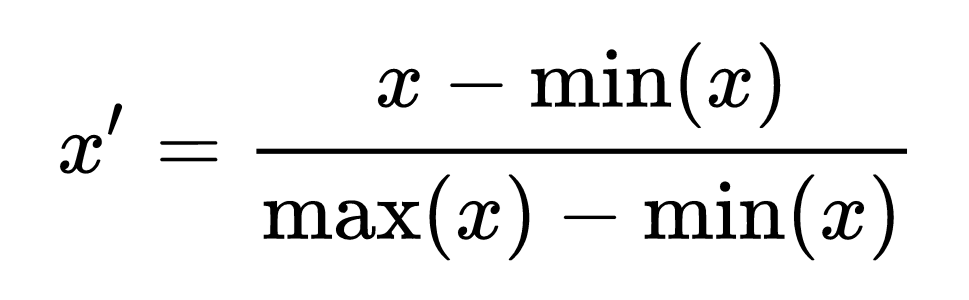

In [121]:
need = ['Pclass','Age','SibSp','Parch','Fare']
scaler = MinMaxScaler()
df_cleaned[need]=scaler.fit_transform(df_cleaned[need])
#df_num=pd.DataFrame(data=df_num)

In [122]:
df_cleaned.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Survived
0,1.0,1.0,0.293286,0.125,0.000000,0.027567,0.0,1.0,0.0
1,0.0,0.0,0.510737,0.125,0.000000,0.271039,0.0,0.0,1.0
2,1.0,0.0,0.347649,0.000,0.000000,0.030133,0.0,1.0,1.0
3,0.0,0.0,0.469965,0.125,0.000000,0.201901,0.0,1.0,1.0
5,1.0,1.0,0.643925,0.000,0.000000,0.032161,1.0,0.0,0.0
6,0.0,1.0,0.728187,0.000,0.000000,0.197196,0.0,1.0,0.0
7,1.0,1.0,0.021473,0.375,0.166667,0.080133,0.0,1.0,0.0
8,1.0,0.0,0.361239,0.000,0.333333,0.042332,0.0,1.0,1.0
9,0.5,0.0,0.184561,0.125,0.000000,0.114338,0.0,0.0,1.0
10,1.0,0.0,0.048655,0.125,0.166667,0.063498,0.0,1.0,1.0


C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


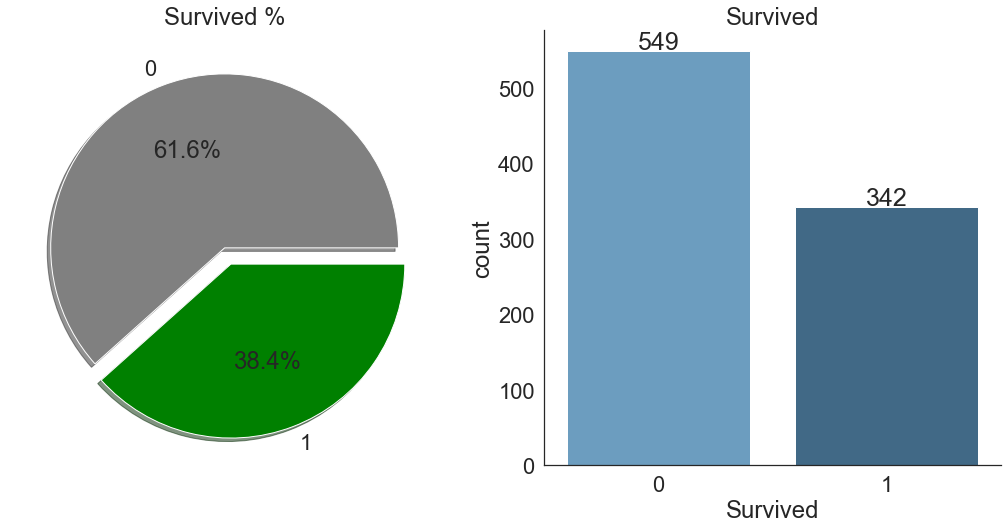

In [123]:
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['grey', 'green'])
ax[0].set_title('Survived %')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1], palette='Blues_d')
ax[1].set_title('Survived')
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 25)
sns.despine()

Text(0.5, 1.0, 'Correlation Plot')

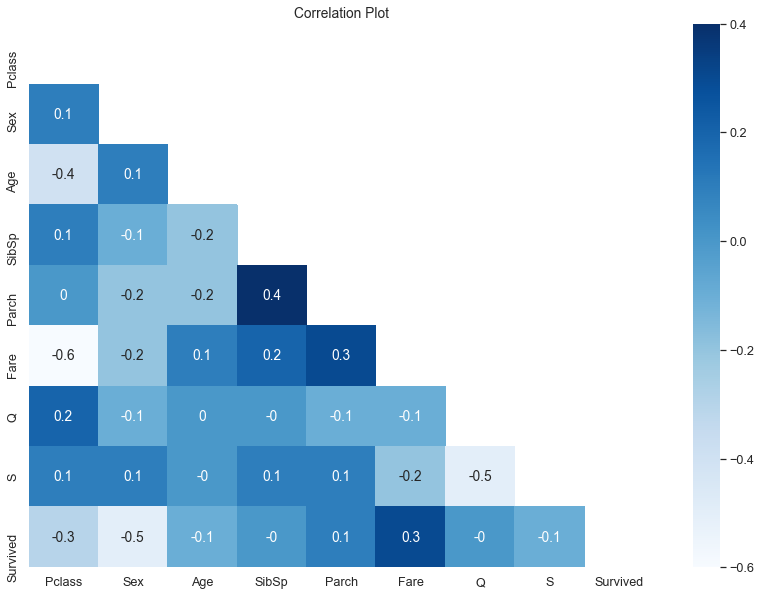

In [124]:
corr=df_cleaned.corr().round(1)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.set_palette("bright")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues',mask=mask,cbar=True)
plt.title('Correlation Plot')

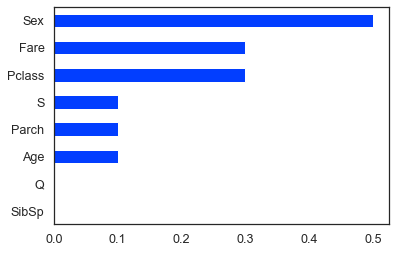

In [125]:
abs(corr['Survived']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')

In [39]:
# because Q and SibSp has low corr with survival rate, hence we drop them
def drop_features(df):
    df.drop(['SibSp','Q'],
            axis=1,
            inplace=True)
    return df

titanic_df = drop_features(df_cleaned)

In [46]:
titanic_df.head(20)

,Pclass,Sex,Age,Parch,Fare,S,Survived
0,3.0,1.0,22.0,0.0,7.2500,1.0,0.0
1,1.0,0.0,38.0,0.0,71.2833,0.0,1.0
2,3.0,0.0,26.0,0.0,7.9250,1.0,1.0
3,1.0,0.0,35.0,0.0,53.1000,1.0,1.0
5,3.0,1.0,47.8,0.0,8.4583,0.0,0.0
6,1.0,1.0,54.0,0.0,51.8625,1.0,0.0
7,3.0,1.0,2.0,1.0,21.0750,1.0,0.0
8,3.0,0.0,27.0,2.0,11.1333,1.0,1.0
9,2.0,0.0,14.0,0.0,30.0708,0.0,1.0
10,3.0,0.0,4.0,1.0,16.7000,1.0,1.0


<Figure size 1008x720 with 0 Axes>

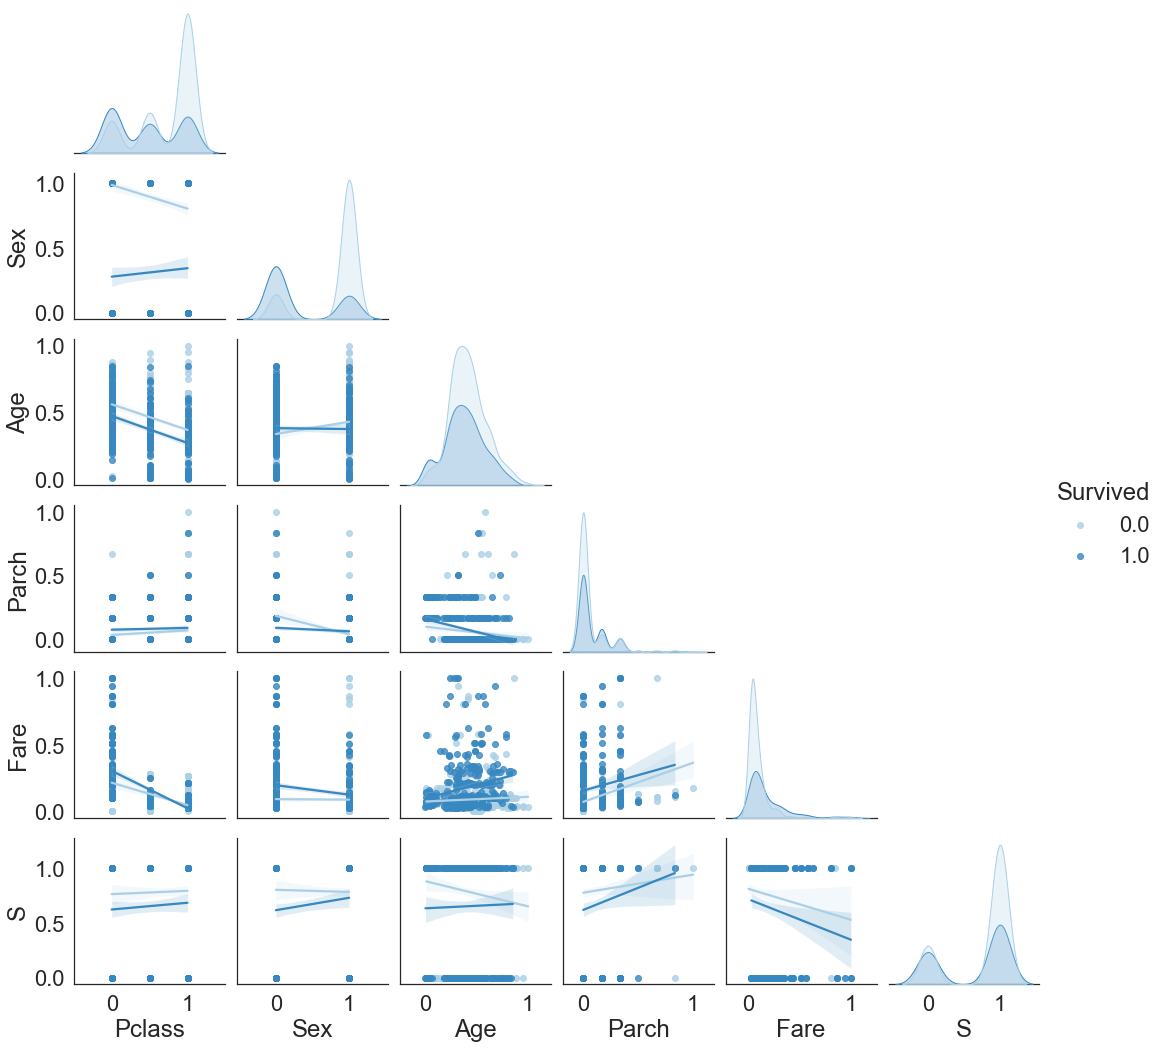

In [128]:
sns.set(font_scale=2)
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(titanic_df,kind = 'reg',corner = True,palette ='Blues',hue='Survived' )

In [41]:
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [131]:
MNB = MultinomialNB()
scores = cross_val_score(MNB, X_titanic_df , y_titanic_df , cv =10 , scoring = 'accuracy')
scores.mean()

0.6935712134899127

In [132]:
GNB = GaussianNB()
scores = cross_val_score(GNB,X_titanic_df , y_titanic_df, cv =10 , scoring = 'accuracy')
scores.mean()

0.7781993375489311

In [133]:
def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion) 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    return confusion

In [48]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
# pickle the model:
#pd.to_pickle(logreg,"titanic_model.pickle")
#Evaluate with Prevoius Test
y_pred=logreg.predict([[2,0,23,1,54,1]])
y_pred

array([1.])

In [135]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix#129/164= 0.786585..

array([[80, 17],
       [18, 49]], dtype=int64)

In [136]:
confusion = get_clf_eval(y_val, pred=y_pred)

confusion matrix
[[80 17]
 [18 49]]
accuracy: 0.7866, precision: 0.7424, recall: 0.7313,    F1: 0.7368


In [50]:
pd.read_pickle('titanic_model.pickle')

LogisticRegression()